In [1]:
# Load necessary modules and dataset 
import sys
sys.path.append(r"/mnt/ceph/users/tudomlumleart/00_VirtualEnvironments/teeu/lib/python3.10/site-packages")
sys.path.append(r"/mnt/home/tudomlumleart/.local/lib/python3.10/site-packages/")
sys.path.append(r"/mnt/home/tudomlumleart/ceph/00_VirtualEnvironments/jupyter-gpu/lib/python3.10/site-packages")

import matplotlib.pyplot as plt
from functions import *
from utils import *

import re

In [2]:
import pandas as pd
import glob
import os

In [16]:
def read_errors(file_path):
    # Initialize an empty list to store the extracted numbers
    errors = []

    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Use a regular expression to find the number in the line
            match = re.search(r'Error:\s+([0-9.]+)', line)
            if match:
                # Convert the matched string to a float and append to the list
                errors.append(float(match.group(1)))
    
    return errors


In [33]:
# Initialize a list to store data
data = []

folder_path = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/MatrixCompletion_results/20240724_single'

# Loop through each file in the folder
for filename in tqdm(os.listdir(folder_path)):
    if filename.endswith('.txt'):
        # Parse parameters from filename
        params = filename[:-4].split('_')[4:7]
        
        # Read the content of the file into a DataFrame
        file_path = os.path.join(folder_path, filename)
        errors_list = read_errors(file_path)
        
        col_names = ['nuclear_l1_ball', 'nuclear_surface', 'linear_imputation']  
        
        file_df = pd.DataFrame({col:[err] for (col,err) in zip(col_names, errors_list)})
        params_name = ['num_templates', 'weight_dist', 'noise_std']
        
        # Repeat parameters for each row in the file_df
        for i, param in enumerate(params):
            file_df[params_name[i]] = float(param)
        
        # Append the DataFrame to the list
        data.append(file_df)

# Concatenate all the individual DataFrames into one
final_df = pd.concat(data, ignore_index=True)

  0%|          | 0/73 [00:00<?, ?it/s]

In [23]:
final_df

,nuclear_l1_ball,nuclear_surface,linear_imputation,num_templates,weight_dist,noise_std
0,8.016389e+05,1.432736e+06,9.328915e+05,10.0,0.0,10.0
1,1.038322e+06,1.815086e+06,1.249552e+06,500.0,1000.0,40.0
2,8.605741e+05,1.765430e+06,7.068993e+05,2.0,0.0,2.0
3,8.808461e+05,1.744957e+06,1.348160e+06,100.0,1000.0,40.0
4,9.160408e+05,1.573550e+06,1.208567e+06,50.0,1.0,2.0
...,...,...,...,...,...,...
68,8.029612e+05,1.592505e+06,9.521498e+05,10.0,1.0,10.0
69,6.711523e+05,1.340389e+06,1.095681e+06,5.0,1000.0,20.0
70,1.129645e+06,1.581138e+06,1.296053e+06,100.0,1000.0,20.0
71,7.087162e+05,1.680225e+06,1.230108e+06,500.0,1000.0,10.0


In [26]:
final_df['l1_lin_ratio'] = final_df['nuclear_l1_ball'] / final_df['linear_imputation']
final_df['surf_lin_ratio'] = final_df['nuclear_surface'] / final_df['linear_imputation']

/tmp/ipykernel_2134443/2950843778.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.lineplot(data=final_df, x='num_templates', y='l1_lin_ratio', palette="flare")


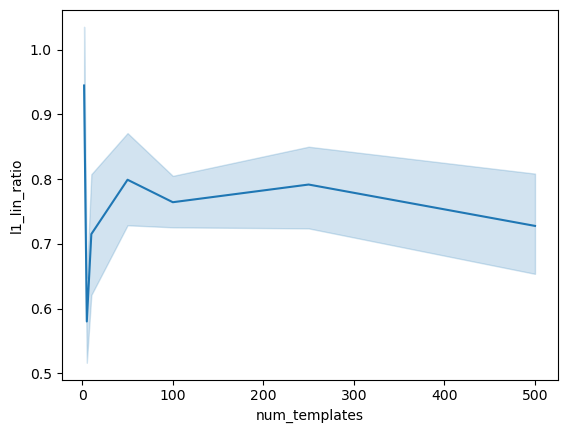

In [32]:
p = sns.lineplot(data=final_df, x='num_templates', y='l1_lin_ratio', palette="flare")
# p2 = sns.lineplot(data=final_df, x='num_templates', y= 'surf_lin_ratio', palette="flare")
# p.set_ylabel('MSE Loss between True and Predicted Structures')
# p.set_xlabel('Number of templates')